In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

C:\Users\GJ\AppData\Local\Temp\ipykernel_10260\51366758.py:36: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df2[df2.상호명.str.contains('(배|베)스킨라빈스|baskinrobbins')]
C:\Users\GJ\AppData\Local\Temp\ipykernel_10260\51366758.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df3 = df2[df2['상호명'].str.lower().str.contains('(배|베)스킨라빈스|baskinrobbins|던킨|dunkin')]
C:\Users\GJ\AppData\Local\Temp\ipykernel_10260\51366758.py:49: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df3[df3.상호명.str.lower().str.contains('(배|베)스킨라빈스|baskinrobbins')].상호명
C:\Users\GJ\AppData\Local\Temp\ipykernel_10260\51366758.py:50: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
 

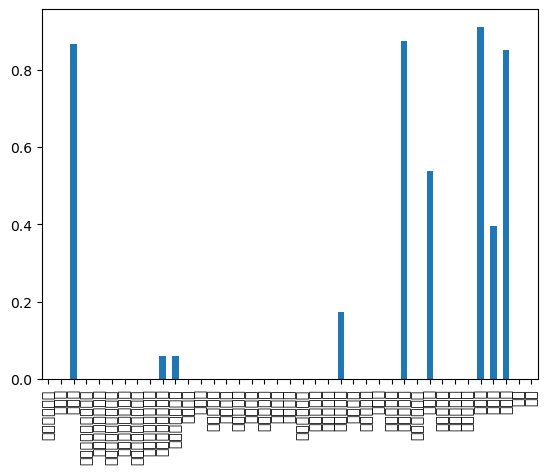

In [16]:
df = pd.read_csv('D:\BookExample_Python\Lecture03\Tranning\eda_data_files\상가업소정보_201912_01.csv', sep='|')

df.head(3)
df.info()
df.isnull().sum()
df.isnull().sum()/len(df)
#(df.isnull().sum()/len(df)).plot(kind='bar')

# nan 비율높은 상위 6
(df.isnull().sum()/len(df)).sort_values(ascending=False).head(6)


df1 = df[['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명',
       '시도명', '시군구명', '행정동명', '법정동명',
       '도로명주소', '경도', '위도']].copy()

# 결측치 제거
# .dropna(): 이 메서드는 결측치를 삭제하는데 사용됩니다. 
# 여기서는 행(row)을 기준으로 결측치를 삭제합니다.
# 방향확인 잘하기 axis=0 은 행방향, 연산 수행
df1.dropna(axis=0, inplace=True)

df2 = df1[df1['시도명'] == '서울특별시']
df2.head()

# 배
df2[df2.상호명 == '배스킨라빈스']

# 베
df2[df2.상호명 == '베스킨라빈스']

# 영어
df2[df2.상호명 == 'baskinrobbins']

# contains 포함하고잇으면 찾아줌
df2[df2.상호명.str.contains('(배|베)스킨라빈스|baskinrobbins')]

df2[df2['상호명'] == '던킨']
df2[df2['상호명'] == '던킨도넛']
df2[df2['상호명'] == '던킨도너츠']
df2[df2['상호명'] == 'dunkindoonuts']

df2[df2['상호명'].str.lower() == 'dunkindoonuts']
df2[df2['상호명'].str.lower().str.contains('던킨|dunkin')]
df3 = df2[df2['상호명'].str.lower().str.contains('(배|베)스킨라빈스|baskinrobbins|던킨|dunkin')]
df3.head()

# 위랑 같은거
df3[df3.상호명.str.lower().str.contains('(배|베)스킨라빈스|baskinrobbins')].상호명
df3.loc[df3.상호명.str.lower().str.contains('(배|베)스킨라빈스|baskinrobbins'),'상호명']

# 파이썬 용법으로 넣기  실행안됨
#df3['브랜드명'] = [i for i in df3.상호명 if i in ['배스킨라빈스', '베스킨라빈스', 'baskinrobbins'] else np.nan]
#df3['브랜드명'] = [i for i in df3.상호명 if i in ['배스킨라빈스', '베스킨라빈스', 'baskinrobbins'] else np.nan for i in df3.상호명]
#df3['브랜드명'] = [i for i in df3.상호명 if i in ['배스킨라빈스', '베스킨라빈스', 'baskinrobbins'] else np.nan]

#df3.drop('브랜드명', axis=1 ,inplace=True)

df3.loc[df3.상호명.str.lower().str.contains('(배|베)스킨라빈스|baskinrobbins'), '브랜드명'] = '배스킨라빈스'



In [17]:
df3.head(4)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,브랜드명
76,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,관악구,청룡동,봉천동,서울특별시 관악구 관악로 161,126.952166,37.479599,배스킨라빈스
1167,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,서대문구,신촌동,대현동,서울특별시 서대문구 이화여대길 56,126.945369,37.559263,NaN
1819,던킨도너츠테크노마트점,음식,패스트푸드,도너츠전문,서울특별시,광진구,구의3동,구의동,서울특별시 광진구 광나루로56길 85,127.095681,37.535713,NaN
2164,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,마포구,서교동,서교동,서울특별시 마포구 와우산로 88,126.923809,37.552104,배스킨라빈스


In [ ]:
# 베스킨라빈스, 던킨도너츠의 서울시 구별 매장수를 비교

In [ ]:
# 서울특별시만 추출

In [ ]:
hjj

In [ ]:
df3.info()

In [ ]:
df3.head(2)

In [ ]:
# 상호명 통합하기

In [ ]:
# 이전 문제
df3.head(19)

In [ ]:
df3.info()

In [ ]:
# 판다스로 구현하기

#df3.loc[df3.상호명.str.lower().str.contains('(배|베)스킨라빈스|baskinrobbins'), '브랜드명'] = '배스킨라빈스'

#df3['브랜드명'] = [i for i in df3.상호명 if i in ['배스킨라빈스', '베스킨라빈스', 'baskinrobbins'] else np.nan]

In [ ]:
df3.head()

In [ ]:
df3.iloc[2]['브랜드명']
df3['브랜드명'].isnull()

In [ ]:
df3.브랜드명.isnull().sum()

In [ ]:
df3.브랜드명.fillna('던킨도너츠', inplace=True)

In [ ]:
df3['브랜드명'].replace(np.nan, '던킨도너츠', inplace=True)

In [ ]:
df3.info

In [ ]:
df3.info()

In [ ]:
df3.브랜드명.value_counts()

In [ ]:
# 목록 확인
df3['상권업종대분류명'].value_counts()

In [ ]:
df3['상권업종대분류명'].isin(['생활서비스', '소매'])

In [ ]:
df3[df3['상권업종대분류명'].isin(['생활서비스', '소매'])]

In [ ]:
# 전처리 된 데이터 df4 <-
df4 = df3[~df3['상권업종대분류명'].isin(['생활서비스', '소매'])]

In [ ]:
df4['상권업종대분류명'].value_counts

In [ ]:
df4['상권업종대분류명'].value_counts()

In [ ]:
df4['브랜드명'].value_counts()

In [ ]:
df4.브랜드명.value_counts()/len(df4)

In [ ]:
df4.브랜드명.value_counts(normalize=True)

In [ ]:
df4.head(2)

In [ ]:
df4.groupby(['브랜드명', '시군구명']).count()  # multi groupby > 세부적으로 그룹생성 > multi

In [ ]:
# 왠지 모르겠는데 던킨이 nan으로됨


In [ ]:
df4.groupby(['브랜드명', '시군구명']).count().경도     # multi groupby > 세부적으로 그룹생성 > multi index

In [ ]:
# 왜안되지
df4.loc[df.index == 'nan', '브랜드명'] = '던킨도너츠'

In [ ]:
df4.groupby(['브랜드명', '시군구명']).count().경도.unstack()

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(data=df4, x='시군구명')
plt.show()

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(data=df4, x='시군구명', hue='브랜드명')
plt.show()

In [ ]:
sns.scatterplot(data=df4, x='경도', y='위도', hue='브랜드명')

In [ ]:
import folium

In [ ]:
lat = df4.위도.mean()
long = df4.경도.mean()

folium.Map([lat,long])

In [ ]:
# map 객체 생성
m = folium.Map([lat,long])

# popup
# tooltip = 마우스가 올라갔을 때
# 맵에 마커만들기
folium.Marker([lat, long], 
              popup='<i>베스킨라빈스</i>',
              tootip = '베스킨라빈스').add_to(m)
m

In [ ]:
# map 객체 생성
m = folium.Map([lat,long], zoom_start=12)
# 초기줌값
df4_sample = df4.sample(30)

# popup
# tooltip = 마우스가 올라갔을 때
# 맵에 마커만들기
# 2탄
for i in df4_sample.index:
    sub_lat = df4_sample.loc[i,'위도']
    sub_long = df4_sample.loc[i,'경도']
    title = df4_sample.loc[i,'상호명'] + '-' + df4_sample.loc[i,'도로명주소']
    
    icon_color = 'blue'
    if df4_sample.loc[i,'브랜드명'] == '던킨도너츠':
        icon_color = 'red'
    folium.Marker([sub_lat, sub_long],
        icon=folium.Icon(color=icon_color),
        popup=f'<i>{title}</i>',
        tooltip=title).add_to(m)
m

In [ ]:
# 강사님 ver
# map객체 생성
m = folium.Map([lat, long], zoom_start=12)

df4_sample = df4.sample(30)

# map에 marker를 추가
for i in df4_sample.index:
  sub_lat = df4_sample.loc[i, '위도']
  sub_long = df4_sample.loc[i, '경도']
  title = df4_sample.loc[i, '상호명'] + '-' + df4_sample.loc[i, '도로명주소']

  icon_color ='blue'
  if df4_sample.loc[i, '브랜드명'] == '던킨도너츠':
    icon_color='red'

  folium.Marker([sub_lat, sub_long],
                icon=folium.Icon(color=icon_color),
                popup=f'<i>{title}</i>',
                tooltip=title).add_to(m)
m


In [ ]:
# import folium

# # Folium 지도 생성
# m = folium.Map(location=[45.5236, -122.6750], zoom_start=13)

# # 사용자 지정 아이콘 생성
# icon = folium.CustomIcon(icon_image='path_to_image.png', icon_size=(30, 30))

# # 마커 생성
# folium.Marker([45.5236, -122.6750], icon=icon).add_to(m)

# # 지도 표시
# m

In [ ]:
# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경합니다.

from folium.plugins import MarkerCluster  # 수정 : markercluster import

m = folium.Map([lat, long], zoom_start=12)
marker_cluster = MarkerCluster().add_to(m)   # 수정 : markercluster를 m에 추가, 변수에 저장

for i in df4_sample.index:

    sub_lat = df4_sample.loc[i, "위도"]
    sub_long = df4_sample.loc[i, "경도"]
    title = df4_sample.loc[i, "상호명"] + " - " + df4_sample.loc[i, "도로명주소"]

    icon_color = "blue"
    if df4_sample.loc[i, "브랜드명"] == "던킨도너츠":
        icon_color = "red"

    folium.Marker(
        [sub_lat, sub_long],
        icon=folium.Icon(color=icon_color),
        popup=f'<i>{title}</i>',
        tooltip=title).add_to(marker_cluster)   # 수정 : markercluster에 추가..

m.save('index.html')
m

# marker의 수에 따라 cluster의 색이 달라짐..